In [1]:
from fastai import *
from fastai.vision import *
import torch.onnx
from torch.autograd import Variable
import os
from torch.optim import *
from fastai.callbacks import OverSamplingCallback

os.environ["TORCH_HOME"] = "/media/subhaditya/DATA/COSMO/Datasets-Useful"

In [2]:
path = Path("/media/subhaditya/DATA/COSMO/Datasets/seedling")

In [3]:
data = (
    (
        ImageList.from_folder(path / "train")
        .split_by_rand_pct()
        .label_from_folder()
        .transform(get_transforms(), size=64)
    )
    .databunch(bs=64)
    .normalize(imagenet_stats)
)

(array([532., 239., 473., 182., 374., 508., 171., 430., 184., 707.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

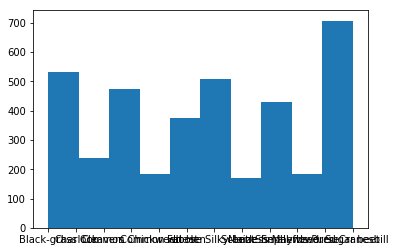

In [4]:
class_sam = [str(x) for x in data.train_ds.y]
plt.hist(class_sam)

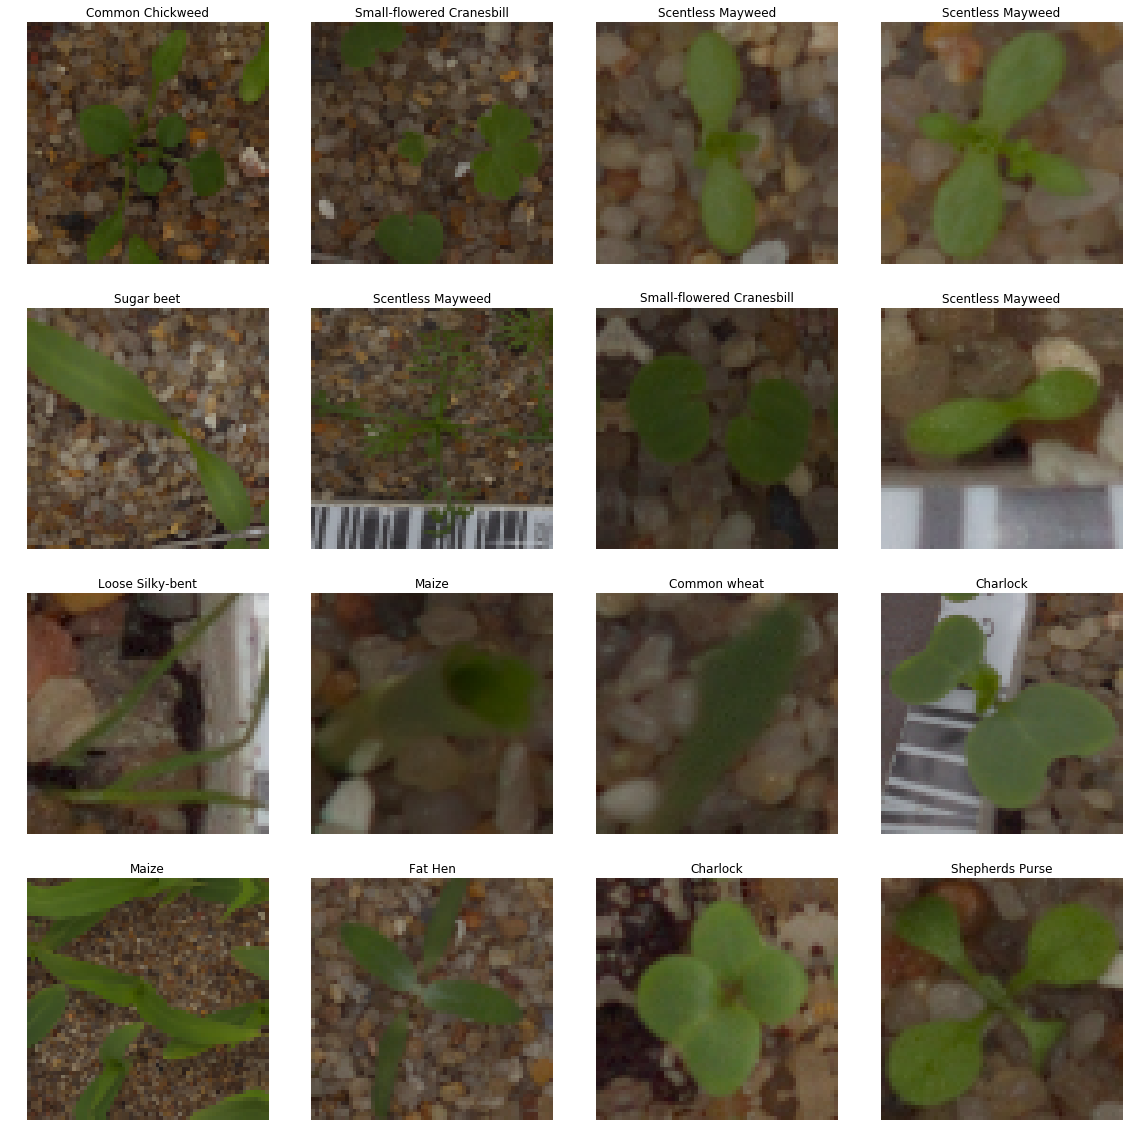

In [5]:
data.show_batch(4)

In [6]:
data.c

12

In [16]:
learn = None
gc.collect()

10710

# resnet34 normal

In [17]:
learn = cnn_learner(
    data, models.resnet34, metrics=[accuracy], opt_func=AdamW, callback_fns=[ShowGraph]
).to_fp16()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


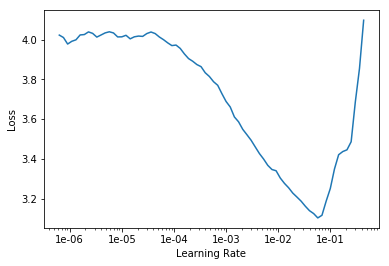

In [18]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,3.805030,2.752016,0.132632,00:17
1,3.274923,2.222308,0.266316,00:18
2,2.486125,1.645388,0.456842,00:17
3,1.696429,1.030569,0.648421,00:18
4,1.127873,0.725712,0.751579,00:18
5,0.743677,0.628295,0.767368,00:17
6,0.564121,0.506336,0.827368,00:18
7,0.441276,0.516174,0.822105,00:17
8,0.364507,0.500616,0.836842,00:19
9,0.323302,0.394546,0.865263,00:18


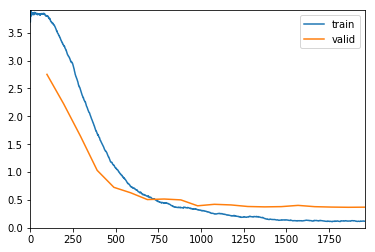

In [19]:
learn.unfreeze()
learn.fit_one_cycle(20, 1e-4, wd=1e-3)

# vgg19 normal

In [20]:
learn = None
gc.collect()

26601

In [21]:
learn = cnn_learner(
    data, models.vgg19_bn, metrics=[accuracy], opt_func=AdamW, callback_fns=[ShowGraph]
).to_fp16()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


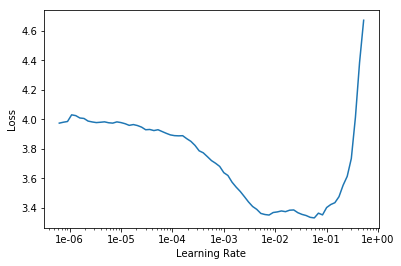

In [22]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,1.614282,0.849227,0.701053,00:18
1,0.776986,0.871956,0.715789,00:19
2,0.631082,0.836819,0.745263,00:18
3,0.679482,0.592983,0.800000,00:19
4,0.476841,0.585203,0.810526,00:18
5,0.826536,0.716814,0.816842,00:18
6,0.581475,1.031815,0.753684,00:18
7,0.417618,0.311320,0.887368,00:18
8,0.306715,0.550651,0.863158,00:18
9,0.260237,0.421582,0.886316,00:17


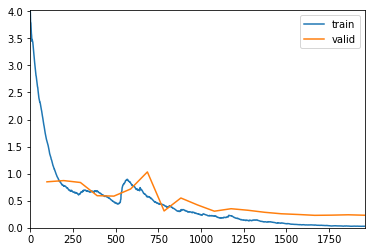

In [23]:
learn.unfreeze()
learn.fit_one_cycle(20, slice(1e-4, 3e-2), wd=1e-3)

In [24]:
learn.save("stage-1")

# resnet50 oversample mixup

In [32]:
learn = None
gc.collect()

35473

In [34]:
learn = (
    cnn_learner(
        data,
        models.resnet50,
        metrics=[accuracy],
        opt_func=AdamW,
        callback_fns=[ShowGraph, OverSamplingCallback],
    )
    .mixup()
    .to_fp16()
)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


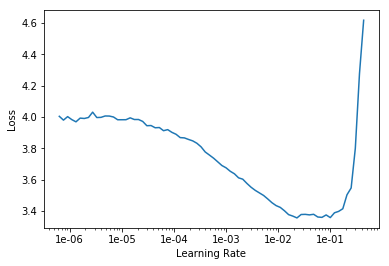

In [35]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,2.343985,1.338554,0.611579,00:17
1,1.757731,0.738580,0.735789,00:18
2,1.456187,0.854687,0.750526,00:19
3,1.328360,0.483703,0.847368,00:18
4,1.417051,2.890898,0.665263,00:18
5,1.464351,0.569768,0.817895,00:18
6,1.250034,0.412132,0.851579,00:19
7,1.094752,0.337646,0.882105,00:18
8,1.095903,0.355765,0.878947,00:19
9,1.117881,nan,0.556842,00:19


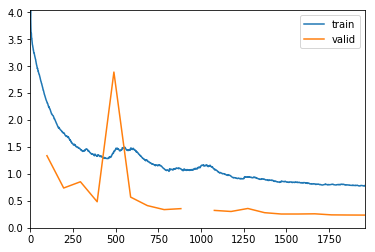

In [36]:
learn.unfreeze()
learn.fit_one_cycle(20, slice(2e-4, 1e-2), wd=1e-3)

In [37]:
learn.save("5stage-1")

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


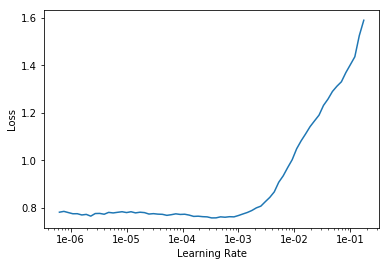

In [38]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.736670,0.239403,0.929474,00:18
1,0.777970,0.241810,0.927368,00:19
2,0.775641,0.247803,0.929474,00:18
3,0.762181,0.247893,0.927368,00:18
4,0.764366,0.289138,0.913684,00:18
5,0.781560,0.283459,0.925263,00:19
6,0.775701,0.273761,0.927368,00:19
7,0.755072,0.257047,0.926316,00:18
8,0.752588,0.286861,0.915789,00:19
9,0.739385,0.261603,0.933684,00:18


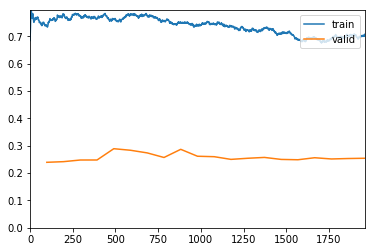

In [39]:
learn.unfreeze()
learn.fit_one_cycle(20, slice(1e-5, 1e-3), wd=1e-2)

# vgg19 oversample mixup

In [7]:
learn = None
gc.collect()

31666

In [9]:
learn = (
    cnn_learner(
        data,
        models.vgg19_bn,
        metrics=[accuracy],
        opt_func=AdamW,
        callback_fns=[ShowGraph, OverSamplingCallback],
    )
    .mixup()
    .to_fp16()
)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


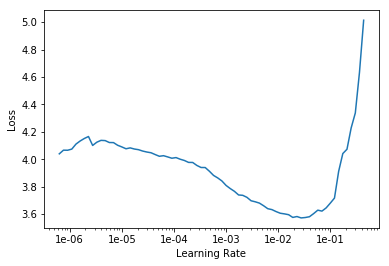

In [10]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,2.667944,1.383806,0.577895,00:47
1,1.880342,0.872345,0.709474,00:18
2,1.437137,0.511903,0.825263,00:16
3,1.228052,0.513241,0.816842,00:16
4,1.180142,0.551076,0.836842,00:17
5,1.293754,0.629921,0.767368,00:16
6,1.315322,0.429170,0.856842,00:17
7,1.092041,0.303179,0.905263,00:16
8,1.008695,0.305585,0.903158,00:16
9,0.980294,0.310174,0.892632,00:17


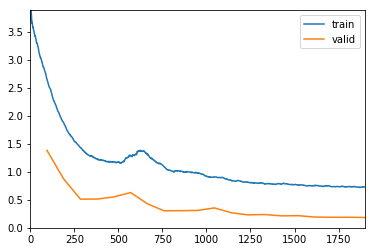

In [11]:
learn.unfreeze()
learn.fit_one_cycle(20, slice(6e-5, 1e-2), wd=1e-3)

In [12]:
learn.save("stage-1")

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


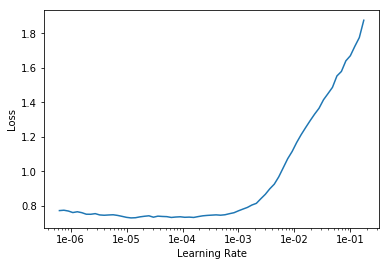

In [13]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.742769,0.184738,0.946316,00:17
1,0.728863,0.195547,0.942105,00:17
2,0.736348,0.207565,0.934737,00:17
3,0.724428,0.195350,0.946316,00:16
4,0.734190,0.211356,0.937895,00:18
5,0.736042,0.220790,0.936842,00:16
6,0.727813,0.191241,0.948421,00:16
7,0.698975,0.188921,0.940000,00:17
8,0.703730,0.196110,0.944211,00:16
9,0.696859,0.190702,0.943158,00:16


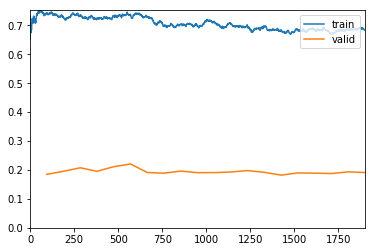

In [14]:
learn.unfreeze()
learn.fit_one_cycle(20, slice(1e-6, 1e-3), wd=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.669496,0.201870,0.945263,00:16
1,0.660755,0.199537,0.945263,00:16
2,0.647848,0.200087,0.949474,00:16
3,0.655601,0.204861,0.948421,00:17
4,0.660915,0.196494,0.947368,00:17
5,0.655980,0.196633,0.950526,00:16
6,0.658918,0.200128,0.955789,00:15
7,0.651617,0.196303,0.956842,00:17
8,0.659091,0.210894,0.947368,00:15
9,0.655425,0.194665,0.951579,00:16


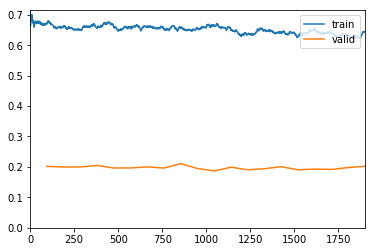

In [16]:
learn.unfreeze()
learn.fit_one_cycle(20, slice(1e-6, 1e-3), wd=1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.614626,0.197228,0.950526,00:15
1,0.631734,0.195779,0.954737,00:16
2,0.631608,0.197509,0.952632,00:16
3,0.635176,0.198661,0.950526,00:17
4,0.626854,0.194291,0.950526,00:18
5,0.641909,0.192485,0.947368,00:17
6,0.628424,0.201646,0.947368,00:18
7,0.642499,0.191315,0.948421,00:19
8,0.655319,0.221382,0.940000,00:17
9,0.647580,0.228869,0.941053,00:16


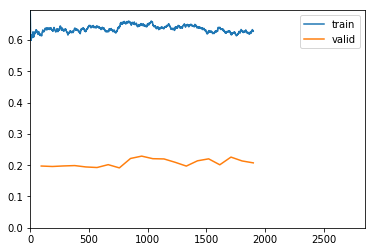

KeyboardInterrupt: 

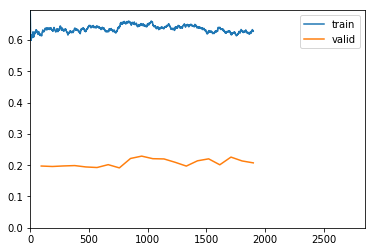

In [17]:
learn.unfreeze()
learn.fit_one_cycle(30, slice(1e-6, 1e-3), wd=1e-2)